In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import matplotlib
matplotlib.style.use('ggplot') # set the style of the plots

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)

## Part 2 - Exploratory Data Analysis

In [149]:
df = pd.read_csv("dataset_filled.csv")
df.head()

,Home_team,Home_score,Home_yellow_cards,Home_red_cards,Home_fouls,Home_corners,Home_crosses,Home_interceptions,Home_offsides,Away_team,...,Away_yellow_cards,Away_red_cards,Away_fouls,Away_corners,Away_crosses,Away_interceptions,Away_offsides,date,league,ball_play_time
0,Manchester United,2,0,0,10,5,23,9,0,Nottingham Forest,...,2,0,13,3,7,8,1,"Saturday December 7, 2024",Premier League 24-25,54:26 / 98:00
1,Ipswich Town,0,0,0,4,4,12,8,1,Manchester City,...,1,0,7,7,8,7,1,"Sunday January 19, 2025",Premier League 24-25,63:49 / 94:03
2,West Ham United,2,5,0,12,11,22,8,4,Wolverhampton Wanderers,...,4,0,17,0,13,4,1,"Monday December 9, 2024",Premier League 24-25,53:46 / 100:23
3,Arsenal,3,0,0,10,13,32,9,1,Southampton,...,3,0,9,1,7,9,0,"Saturday October 5, 2024",Premier League 24-25,56:12 / 102:09
4,Leicester City,0,0,0,7,4,22,9,1,Crystal Palace,...,0,0,6,3,12,9,3,"Wednesday January 15, 2025",Premier League 24-25,62:22 / 98:33


In [150]:
# extract ball_play_time in minutes by rounding 1 digit up if seconds part greater than 30
df['ball_play_time_minutes'] = df['ball_play_time'].str.split("/",expand=True).iloc[:,0].str.split(":").apply(lambda m: int(m[0]) + int(m[1]) / 60)

In [151]:
df['league_info'] = df['league'].str[:-5]

In [152]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Home_score,80.0,1.562500,1.220539,0.00,1.000000,1.0,2.000000,5.000000
Home_yellow_cards,80.0,2.237500,1.801854,0.00,1.000000,2.0,3.000000,8.000000
Home_red_cards,80.0,0.062500,0.243589,0.00,0.000000,0.0,0.000000,1.000000
Home_fouls,80.0,11.162500,4.132133,3.00,8.000000,10.0,13.250000,22.000000
Home_corners,80.0,5.462500,2.976464,0.00,3.000000,5.0,8.000000,13.000000
Home_crosses,80.0,20.862500,8.724683,6.00,15.000000,19.5,25.000000,55.000000
Home_interceptions,80.0,8.287500,3.261567,2.00,6.000000,8.0,10.000000,18.000000
Home_offsides,80.0,1.900000,1.539357,0.00,1.000000,1.5,3.000000,7.000000
Away_score,80.0,1.462500,1.457792,0.00,0.000000,1.0,2.000000,6.000000
Away_yellow_cards,80.0,2.237500,1.407428,0.00,1.000000,2.0,3.000000,6.000000


In [ ]:
def compute_skewness(data):
    centralized = data - np.mean(data)
    std = np.std(data)
    n = data.shape[0]

    skewness = np.sum((centralized / std) ** 3) / n
    return skewness

def compute_kurtosis(data):
    centralized = data - np.mean(data)
    std = np.std(data)
    n = data.shape[0]
    # normal distribution has a kurtosis of 3, so subtract 3 to compare with the normal distribution
    kurtosis = np.sum((centralized / std) ** 4) / n - 3
    return kurtosis

In [154]:
def descriptive_statistics(data):
    print(f"Mean:     {np.mean(data):.2f}")
    print(f"Median:   {np.median(data):.2f}")
    print(f"Std:      {np.std(data,ddof=1):.2f}")
    print(f"Skewness: {compute_skewness(data):.2f}")
    print(f"Kurtosis: {compute_kurtosis(data):.2f}")

In [155]:
# split data as premier league and turkish league
df_pl = df[df.league.str.contains("Premier")]
df_tl = df[df.league.str.contains("Turkish")]

In [156]:
print("Premier League Sample Statistics:")
print("---------------")
descriptive_statistics(df_pl['ball_play_time_minutes'])

Premier League Sample Statistics:
---------------
Mean:     57.70
Median:   57.34
Std:      4.64
Skewness: -0.08
Kurtosis: -0.46


In [157]:
print("Turkish League Sample Statistics:")
print("---------------")
descriptive_statistics(df_tl['ball_play_time_minutes'])

Turkish League Sample Statistics:
---------------
Mean:     52.25
Median:   53.19
Std:      4.59
Skewness: -1.00
Kurtosis: 0.87


<Axes: title={'center': 'Turkish League Ball Play Time'}, ylabel='Frequency'>

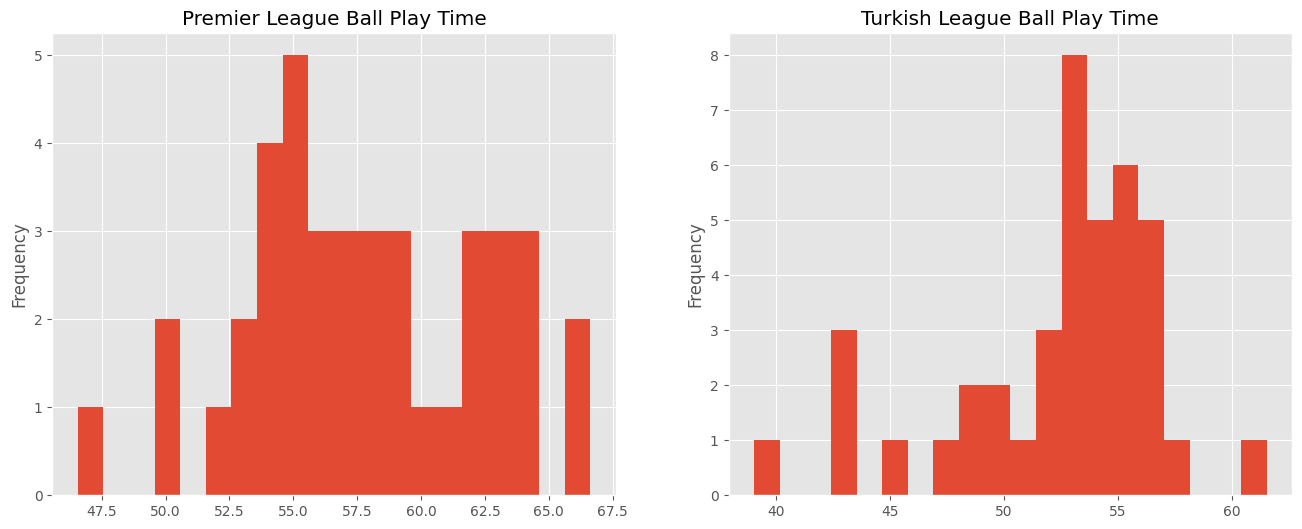

In [158]:
_,ax = plt.subplots(1,2,figsize=(16,6))

df_pl['ball_play_time_minutes'].plot.hist(title="Premier League Ball Play Time",bins=20,ax=ax[0])
df_tl['ball_play_time_minutes'].plot.hist(title="Turkish League Ball Play Time",bins=20,ax=ax[1])

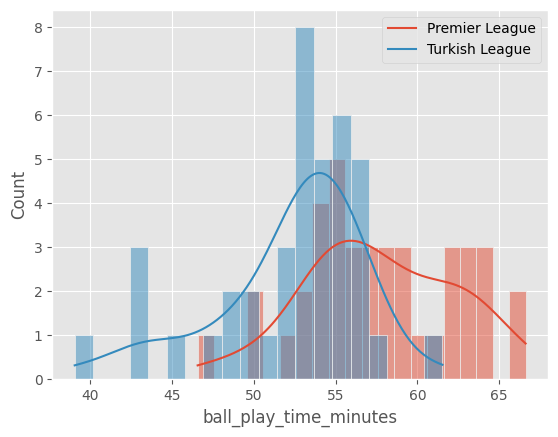

In [159]:
sns.histplot(kde=True,data=df_pl,x='ball_play_time_minutes',bins=20)
sns.histplot(kde=True,data=df_tl,x='ball_play_time_minutes',bins=20)

plt.legend(["Premier League", "Turkish League"])

Text(0.5, 1.0, 'Box Plot')

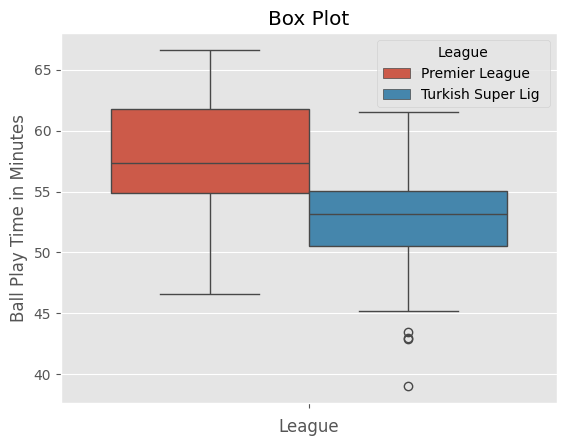

In [160]:
ax = sns.boxplot(data=df,y='ball_play_time_minutes',hue='league_info')
ax.set_ylabel("Ball Play Time in Minutes")
ax.set_xlabel("League")
ax.legend(title='League')
ax.set_title("Box Plot")

## Part 3 - Determining the Underlying Distribution

Premier league distribution is mostly symmetric around the mean with a skewness value close to 0, but the skewness value of Turkish league suggests that it is moslty left skewed.

- Premier league data can be approximated by a normal distribution.
- Turkish league data can be approximated by a skewed-normal distribution. However, it is more complex to estimate the distribution parameters of this distribution. Therefore, i am going to approximate it by a normal distribution.

<b> Method of Moments Estimation </b>


From the lecture notes, MME for normal distirbution is as follows:

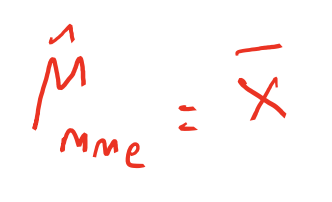

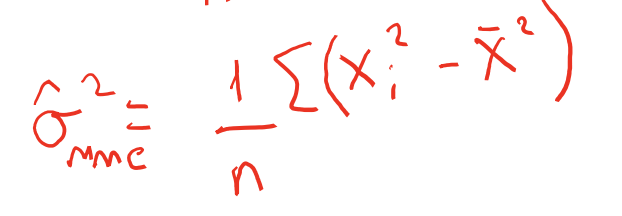

In [15]:
def mme_for_normal(data):
    # from the first moment, population mean is approximated by sample mean
    mean_hat = np.mean(data)
    # from the second moment, population variance is approximated by the following
    n = data.shape[0]
    variance_hat = np.sum(data**2 - mean_hat**2) / n

    return mean_hat, variance_hat

In [16]:
pl_mme_parameters = mme_for_normal(df_pl['ball_play_time_minutes'])
tsl_mme_parameters = mme_for_normal(df_tl['ball_play_time_minutes'])

In [17]:
print(f"PL mean MME: {pl_mme_parameters[0]:.3f}")
print(f"PL variance MME: {pl_mme_parameters[1]:.3f}")
print("------------------------")
print(f"TSL mean MME: {tsl_mme_parameters[0]:.3f}")
print(f"TSL variance MME: {tsl_mme_parameters[1]:.3f}")

PL mean MME: 57.704
PL variance MME: 20.977
------------------------
TSL mean MME: 52.245
TSL variance MME: 20.530


<b> Maximum Likelihood Estimation </b>

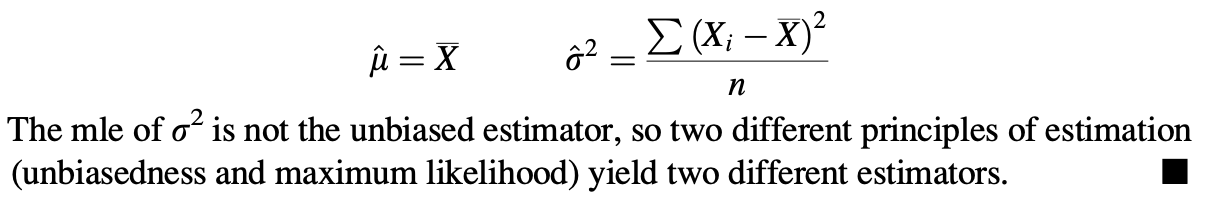

In [18]:
def mle_for_normal(data):
    mean_hat = np.mean(data)

    n = data.shape[0]
    variance_hat = np.sum((data - mean_hat)**2) / n

    return mean_hat, variance_hat

In [19]:
pl_mle_parameters = mle_for_normal(df_pl['ball_play_time_minutes'])
tsl_mle_parameters = mle_for_normal(df_tl['ball_play_time_minutes'])

In [20]:
print(f"PL mean MLE: {pl_mle_parameters[0]:.3f}")
print(f"PL variance MLE: {pl_mle_parameters[1]:.3f}")
print("------------------------")
print(f"TSL mean MLE: {tsl_mle_parameters[0]:.3f}")
print(f"TSL variance MLE: {tsl_mle_parameters[1]:.3f}")

PL mean MLE: 57.704
PL variance MLE: 20.977
------------------------
TSL mean MLE: 52.245
TSL variance MLE: 20.530


<b> Bayesian Estimates with Simple Prior </b>

In [144]:
def plot_prior_posterior(x_bar, prior_mean, prior_var, posterior_mean, posterior_var, league):

    def normal_pdf(mu, mean, var):
        return 1 / np.sqrt(2 * np.pi * var) * np.exp(-(mu - mean)**2 / (2 * var))
    
    # define grid for plotting
    mu_grid = np.linspace(40, 80, 300)
    # get prior and posterior pdf
    prior_pdf = normal_pdf(mu_grid, prior_mean, prior_var)
    posterior_pdf = normal_pdf(mu_grid, posterior_mean, posterior_var)
    # plot the distributions
    plt.figure(figsize=(8, 5))
    plt.plot(mu_grid, prior_pdf, label="Prior", linestyle='--')
    plt.plot(mu_grid, posterior_pdf, label=f"Posterior mean: {posterior_mean:.2f}", color='blue')
    plt.axvline(x_bar, color='gray', linestyle=':', label=f"MLE mean = {x_bar:.2f}")
    plt.title(f"{league} Prior and Posterior Distributions of Mean (μ)")
    plt.xlabel("μ")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [145]:
def bayesian_inference(data, known_variance, prior_mean, prior_variance):
    n = len(data)
    x_bar = np.mean(data)

    # posteriror parameters
    posterior_variance = 1 / (n / known_variance + 1 / prior_variance)
    posterior_mean = posterior_variance * (n * x_bar / known_variance + prior_mean / prior_variance)

    return posterior_mean, posterior_variance

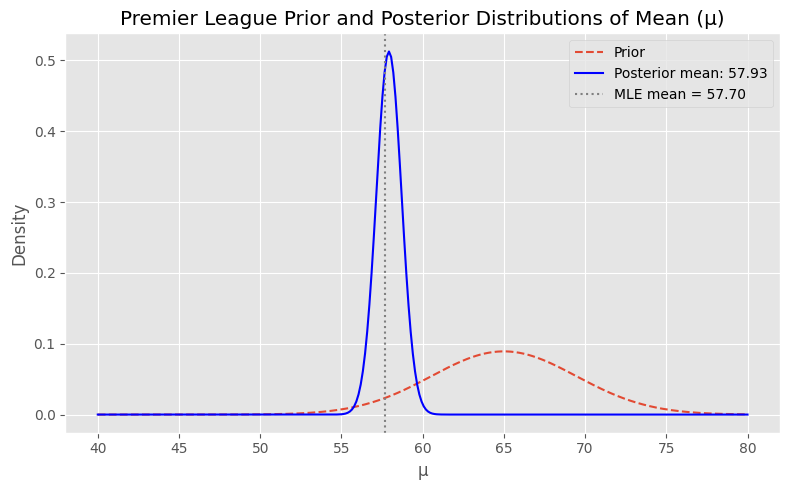

In [146]:
pl_known_var = 25  
pl_prior_mean = 65
pl_prior_var = 20 # weak prior with high variance

pl_posterior_mean, pl_posterior_var = bayesian_inference(df_pl['ball_play_time_minutes'],pl_known_var, pl_prior_mean, pl_prior_var)

plot_prior_posterior(pl_mle_parameters[0], pl_prior_mean, pl_prior_var, pl_posterior_mean, pl_posterior_var, league="Premier League")

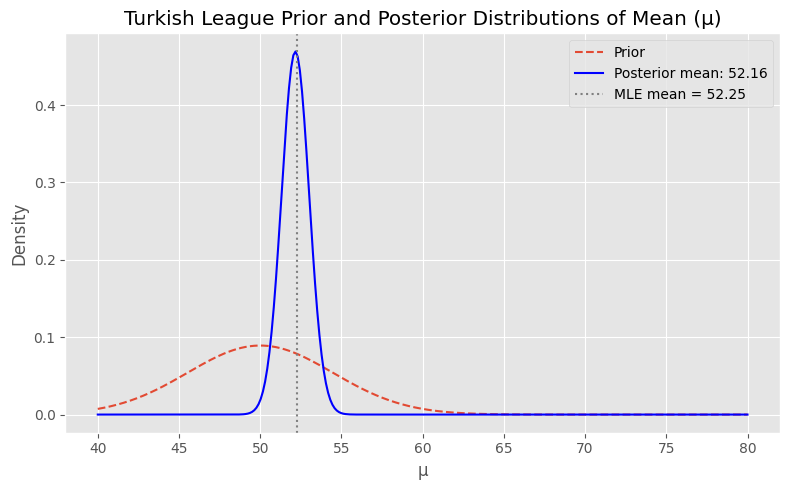

In [147]:
tl_known_var = 30  
tl_prior_mean = 50
tl_prior_var = 20 # weak prior with high variance

tl_posterior_mean, tl_posterior_var = bayesian_inference(df_tl['ball_play_time_minutes'],tl_known_var, tl_prior_mean, tl_prior_var)

plot_prior_posterior(tsl_mle_parameters[0], tl_prior_mean, tl_prior_var, tl_posterior_mean, tl_posterior_var, league="Turkish League")

## Part 4 - Goodness-of-Fit & Hyptohesis Testing

I test if data distribution is well approximated by a normal distribution by using Chi-square test. I followed the Example 13.4 from the text book Modern Mathematical Statistics with Applications. (page 730)

- Bin the data to convert continous distribution into categorical distribution.
- Calculate expected frequencies in each bin using estimated normal distribution mean and sigma. (use cumulative distribution)
- Perform Chi-Square test:
    * H0: Distribution is normal.
    * H1: Distribution is not normal. 

In [189]:
def plot_observed_vs_expected(bin_edges, counts, expected, league):
    # center the bins
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    plt.figure(figsize=(8, 5))
    # plot the observed bin frequencies
    plt.bar(bin_centers, counts, width=4.6, alpha=0.6, label='Observed', align='center')
    # plot the expected bin frequencies as dot plot
    plt.plot(bin_centers, expected, 'o--', color='red', label='Expected (Normal)', linewidth=2)

    plt.xlabel('Ball Play Time (minutes)')
    plt.ylabel('Frequency')
    plt.title(f'{league} Observed vs. Expected Frequencies')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [59]:
# Approximate normal cdf with error function
def normal_cdf(x, mu, sigma):
    z = (x - mu) / (sigma * math.sqrt(2))
    return 0.5 * (1 + math.erf(z))

In [166]:
def chi_square_goodness_of_fit(data, mu, sigma, bins, critical_value=7.815, show_plot=True, league='Premier League'):
    n = len(data)

    counts, bin_edges = np.histogram(data, bins=bins)

    expected = []
    # calculate the expected bin frequencies
    for i in range(len(bin_edges) - 1):
        # use cdf function, for example cdf(50) - cdf(45) gives the probability for bin 45-50
        p = normal_cdf(bin_edges[i + 1], mu, sigma) - normal_cdf(bin_edges[i], mu, sigma)
        # get the frequency by multiplying with the number of data points
        expected_freq = n * p
        expected.append(expected_freq)
    expected = np.array(expected)

    # caluculate chi-square score
    chi_square = np.sum((counts - expected) ** 2 / expected)

    decision = "Reject H0" if chi_square > critical_value else "Fail to reject H0"

    # if show_plot True, then show the observed vs expected plot
    if show_plot: plot_observed_vs_expected(bin_edges,counts,expected,league)

    return chi_square , decision


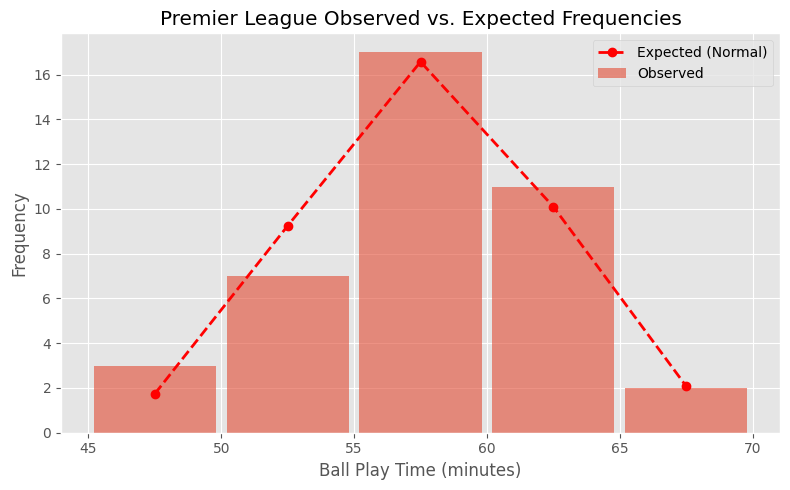

Chi-squre score: 1.55, Critical Value: 7.779
Fail to reject H0


In [190]:
score, decision = chi_square_goodness_of_fit(df_pl['ball_play_time_minutes'], 
                            mu=pl_mle_parameters[0], 
                            sigma=np.sqrt(pl_mle_parameters[1]), 
                            bins=[45,50,55,60,65,70],
                            critical_value=7.779,
                            show_plot=True,
                            league='Premier League')

print(f"Chi-squre score: {score:.2f}, Critical Value: 7.779")
print(decision)

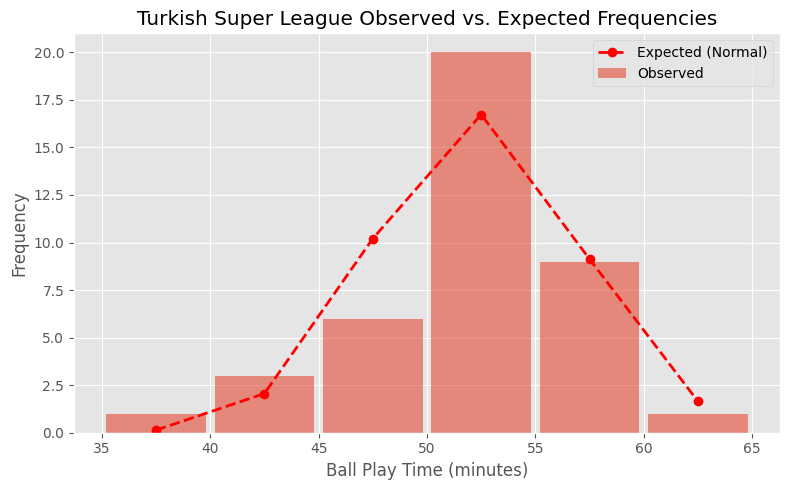

Chi-squre score: 8.61, Critical Value: 9.236
Fail to reject H0


In [191]:
score, decision = chi_square_goodness_of_fit(df_tl['ball_play_time_minutes'], 
                           mu=tsl_mle_parameters[0], 
                           sigma=np.sqrt(tsl_mle_parameters[1]), 
                           bins=[35,40,45,50,55,60,65],
                           critical_value=9.236,
                           show_plot=True,
                           league='Turkish Super League')

print(f"Chi-squre score: {score:.2f}, Critical Value: 9.236")
print(decision)

However, these results are very sensitive to the number of bins defined. In this case, I binned the effective play times in 5 minutes interval, but we can experiment with it by defining different number of bins and check how the hyptothesis decision would change.

In [181]:
number_of_bins = list(range(2,31))
chi2_critical_values_alpha_0_1 = [
    4.605,  # df = 2
    6.251,  # df = 3
    7.779,  # df = 4
    9.236,  # df = 5
    10.645, # df = 6
    12.017, # df = 7
    13.362, # df = 8
    14.684, # df = 9
    15.987, # df = 10
    17.275, # df = 11
    18.549, # df = 12
    19.812, # df = 13
    21.064, # df = 14
    22.307, # df = 15
    23.542, # df = 16
    24.769, # df = 17
    25.989, # df = 18
    27.204, # df = 19
    28.412, # df = 20
    29.615, # df = 21
    30.813, # df = 22
    32.007, # df = 23
    33.196, # df = 24
    34.382, # df = 25
    35.563, # df = 26
    36.741, # df = 27
    37.916, # df = 28
    39.087, # df = 29
    40.256  # df = 30
]

gof_df = pd.DataFrame(index=['PL', 'TSL'],columns=number_of_bins)

# loop through each bin numbers
for idx,bin_num in enumerate(number_of_bins):
    # test for premier league
    pl_bins = np.histogram(df_tl['ball_play_time_minutes'],bins=bin_num)[1]
    score_tsl, decision_tsl = chi_square_goodness_of_fit(df_tl['ball_play_time_minutes'], 
                           mu=tsl_mle_parameters[0], 
                           sigma=np.sqrt(tsl_mle_parameters[1]), 
                           bins=pl_bins,
                           critical_value=chi2_critical_values_alpha_0_1[idx],
                           show_plot=False)
    
    # test for turkis super league
    tsl_bins = np.histogram(df_pl['ball_play_time_minutes'],bins=bin_num)[1]
    score_pl, decision_pl = chi_square_goodness_of_fit(df_pl['ball_play_time_minutes'], 
                        mu=pl_mle_parameters[0], 
                        sigma=np.sqrt(pl_mle_parameters[1]), 
                        bins=tsl_bins,
                        critical_value=chi2_critical_values_alpha_0_1[idx],
                        show_plot=False)
    # record the results on the table
    gof_df.loc['PL',bin_num] = 'A' if decision_pl == 'Fail to reject H0' else 'R'
    gof_df.loc['TSL',bin_num] = 'A' if decision_tsl == 'Fail to reject H0' else 'R'

In [182]:
gof_df

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
PL,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,R,A
TSL,A,A,A,R,A,R,A,A,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R


As the number of bins increases it is easier for us to reject the null hypothesis because there is a left skewness in the Turkish Super League data. For PL data, normal approximation is perfectly good.

I test if Premier League ball play times are higher than Turkish super league. To do this, i will perform one-tailed t-test using alpha value as 0.01. I followed the Example 10.7 from the text book Modern Mathematical Statistics with Applications. (page 502)

H0: u_pl - u_tsl = 0

H1: u_pl - u_tsl > 0

In [ ]:
def t_test(x1,x2):
    mean1 = np.mean(x1)
    mean2 = np.mean(x2)

    # Calculate variances (sample variance with ddof=1)
    var1 = np.var(x1, ddof=1)
    var2 = np.var(x2, ddof=1)

    # Sample sizes
    n1 = len(x1)
    n2 = len(x2)

    # t-statistic
    t_stat = (mean1 - mean2) / np.sqrt(var1/n1 + var2/n2)

    # Degrees of freedom
    dof = (var1/n1 + var2/n2)**2 / ((var1**2)/((n1**2)*(n1-1)) + (var2**2)/((n2**2)*(n2-1)))

    # You can now print the t-statistic and degrees of freedom
    print(f"t-statistic: {t_stat}")
    print(f"degrees of freedom: {dof}")

    return t_stat, dof

In [16]:
t_value, dof = t_test(df_pl['ball_play_time_minutes'], df_tl['ball_play_time_minutes'])

t-statistic: 5.307916290084795
degrees of freedom: 77.98262702541477


Critical value for t-distribution for dof 77 and alpha 0.01 is 2.3758. Additionally, the p-value is < .00001 for t-statistics 5.3079 with dof 77 which is a very small value.

In [17]:
# Interpretation
critical_value = 2.3758

if t_value > critical_value:
    print("Reject the null hypothesis: Premier League has significantly higher ball-in-play time.")
else:
    print("Fail to reject the null hypothesis: No significant difference or TSL is not lower.")

Reject the null hypothesis: Premier League has significantly higher ball-in-play time.


## Part 5 - Linear Regression

In [64]:
predictor_variables = ['Home_score', 'Home_yellow_cards', 'Home_red_cards',
       'Home_fouls', 'Home_corners', 'Home_crosses', 'Home_interceptions',
       'Home_offsides', 'Away_score', 'Away_yellow_cards',
       'Away_red_cards', 'Away_fouls', 'Away_corners', 'Away_crosses',
       'Away_interceptions', 'Away_offsides']

In [ ]:
X_tsl = df_tl[predictor_variables]
y_tsl = df_tl['ball_play_time_minutes']

X_pl = df_pl[predictor_variables]
y_pl = df_pl['ball_play_time_minutes']

variables = [var.split("_",1)[1] for var in predictor_variables]

# sum the statistics for home and away teams into one single column
for var in variables:
    X_tsl[f'total_{var}'] = X_tsl[f'Away_{var}'] + X_tsl[f'Home_{var}']
    X_pl[f'total_{var}'] = X_pl[f'Away_{var}'] + X_pl[f'Home_{var}']

# drop the previous columns
X_tsl.drop(predictor_variables,axis=1,inplace=True)
X_pl.drop(predictor_variables,axis=1,inplace=True)

variables = list(X_tsl.columns)
X_tsl.head()

,total_score,total_yellow_cards,total_red_cards,total_fouls,total_corners,total_crosses,total_interceptions,total_offsides
20,1,2,0,29,7,35,26,6
21,6,7,0,28,8,29,21,1
22,2,7,0,23,6,22,10,2
23,3,8,0,23,6,43,9,4
24,4,11,0,19,6,36,20,6


In [66]:
def linear_regression(X,y):
    # add bias
    X = np.hstack([np.ones(X.shape[0]).reshape(-1,1),X])
    # get model parameters
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta

In [ ]:
# make predictions and calculate mean squared error
def calculate_mse(beta, X, y):
    X = np.hstack([np.ones(X.shape[0]).reshape(-1,1),X])

    y_hat = X @ beta

    return np.sum((y - y_hat)**2)

In [ ]:
# get regression parameters
tsl_params = linear_regression(X_tsl, y_tsl)
pl_params = linear_regression(X_pl, y_pl)

In [110]:
print("TSL MSE:", calculate_mse(tsl_params, X_tsl, y_tsl))
print("TSL RMSE:", np.sqrt(calculate_mse(tsl_params, X_tsl, y_tsl)))
print("---------------------------------")
print("PL MSE:",calculate_mse(pl_params, X_pl, y_pl))
print("PL RMSE:",np.sqrt(calculate_mse(pl_params, X_pl, y_pl)))

TSL MSE: 408.1894422797835
TSL RMSE: 20.203698727702893
---------------------------------
PL MSE: 467.23188380095644
PL RMSE: 21.61554727044764


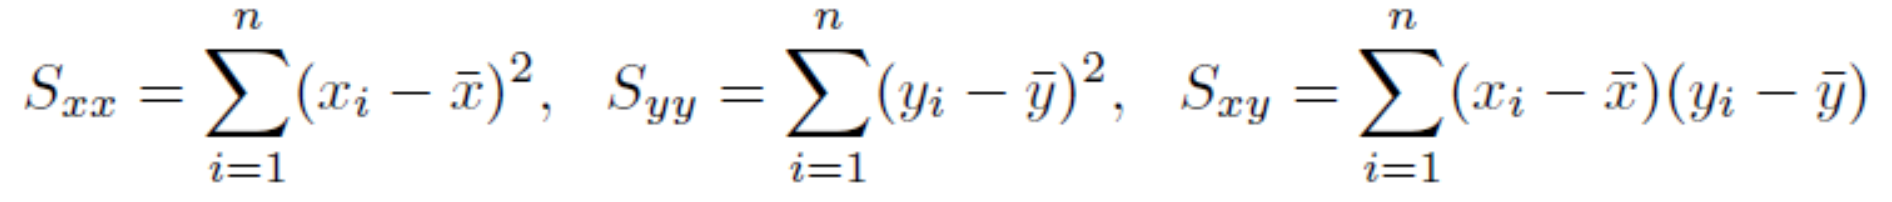

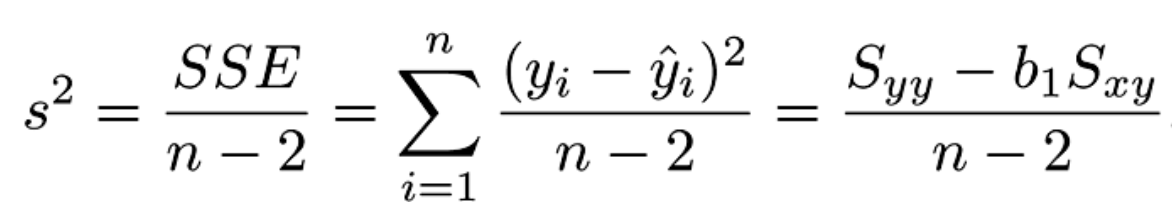

In [ ]:
# H0: beta_i = 0 
# H1: beta_i != 0
# with alpha = 0.1, dof = 38
# critical region = (-∞, -1.686] ∪ [1.686, ∞)
# this is equal to 0.05 alpha one tailed test

def significance_test_regression_coefficients(X,y,beta,i):
    # add intercept
    X = np.hstack([np.ones(X.shape[0]).reshape(-1,1),X])

    n = X.shape[0]
    y_bar = np.mean(y)
    xi_bar = np.mean(X[:,i]) # calculate x_bar for the respective variable that is specified with i index

    Sxx = np.sum((X[:,i] - xi_bar)**2)
    Syy = np.sum((y - y_bar)**2)
    Sxy = np.sum((X[:,i] - xi_bar)*(y - y_bar))

    s_square = (Syy - beta[i]*Sxy) / (n - 2)
    std_error = np.sqrt(s_square) / np.sqrt(Sxx)

    t_calc = (beta[i] - 0) / std_error
    return t_calc, std_error

In [71]:
variables = ['intercept'] + variables # add also intercept to the predictor variables

In [105]:
critical_region = 1.68

# table format
print("Parameter Estimates for Turkish Super League")
print(f"{'Term':<25}{'Estimate':>10}{'Std Error':>15}{'t-Calc':>10}{'Significance':>18}")
print("-" * 78)

# loop through each variable
for idx, var in enumerate(variables):
    # calculate t-value and std error
    t_calc, std_error = significance_test_regression_coefficients(X_tsl, y_tsl, tsl_params, idx)
    # reject or accept hypothesis based on critical value and calculated t value
    significance_result = "Significant" if np.abs(t_calc) > critical_region else "Not Significant"
    estimate = tsl_params[idx]

    # check for na or inf cases for std error and t calculated
    std_err_str = f"{std_error:.2f}" if np.isfinite(std_error) else "inf"
    t_calc_str = f"{t_calc:.2f}" if np.isfinite(t_calc) else "inf"
    # print the results for that predictor variable
    print(f"{var:<25}{estimate:>10.2f}{std_err_str:>15}{t_calc_str:>10}{significance_result:>18}")


Parameter Estimates for Turkish Super League
Term                       Estimate      Std Error    t-Calc      Significance
------------------------------------------------------------------------------
intercept                     70.91            inf      0.00   Not Significant
total_score                   -0.47           0.36     -1.31   Not Significant
total_yellow_cards            -0.43           0.28     -1.54   Not Significant
total_red_cards                0.80           1.59      0.51   Not Significant
total_fouls                   -0.29           0.15     -1.94       Significant
total_corners                 -0.39           0.21     -1.88       Significant
total_crosses                 -0.11           0.09     -1.25   Not Significant
total_interceptions            0.05           0.14      0.40   Not Significant
total_offsides                -0.32           0.38     -0.84   Not Significant


In [107]:
# table format
print("Parameter Estimates for Premier League")
print(f"{'Term':<25}{'Estimate':>10}{'Std Error':>15}{'t-Calc':>10}{'Significance':>18}")
print("-" * 78)

# loop through each variable
for idx, var in enumerate(variables):
    # calculate t-value and std error
    t_calc, std_error = significance_test_regression_coefficients(X_pl, y_pl, tsl_params, idx)
    # reject or accept hypothesis based on critical value and calculated t value
    significance_result = "Significant" if np.abs(t_calc) > critical_region else "Not Significant"
    estimate = pl_params[idx]

    # check for na or inf cases for std error and t calculated
    std_err_str = f"{std_error:.2f}" if np.isfinite(std_error) else "inf"
    t_calc_str = f"{t_calc:.2f}" if np.isfinite(t_calc) else "inf"
    # print the results for that predictor variable
    print(f"{var:<25}{estimate:>10.2f}{std_err_str:>15}{t_calc_str:>10}{significance_result:>18}")


Parameter Estimates for Premier League
Term                       Estimate      Std Error    t-Calc      Significance
------------------------------------------------------------------------------
intercept                     73.30            inf      0.00   Not Significant
total_score                   -0.11           0.43     -1.10   Not Significant
total_yellow_cards             0.09           0.31     -1.35   Not Significant
total_red_cards               -0.29           1.46      0.55   Not Significant
total_fouls                   -0.45           0.13     -2.20       Significant
total_corners                 -0.69           0.23     -1.73       Significant
total_crosses                  0.01           0.08     -1.45   Not Significant
total_interceptions            0.07           0.17      0.32   Not Significant
total_offsides                -0.30           0.36     -0.89   Not Significant
